In [175]:
import numpy as np
import asset_calculations
import bond_calculations

In [176]:
nominal = 100
coupon = 0.07
ytm = 0.05
maturity = 10
freq = 2

In [177]:
price = bond_calculations.bond_price(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)
price

115.58916228564698

In [178]:
duration = bond_calculations.bond_duration(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)
duration

(7.564844312053696, 7.380335914198728)

In [179]:
bond_calculations.bond_convexity(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)

68.13466420693906

In [170]:
bond_calculations.bond_ytm(nominal=nominal, market_price=price, coupon=coupon, maturity=maturity)

0.035195924402412884

---
## taylor series approximation

$$\frac{ΔP}{P} = -D \cdot \Delta y + \frac{1}{2} \cdot C \cdot (y^2)$$


In [171]:
def adjusted_bond_price(nominal: float, coupon: float, ytm: float, maturity: int, freq: int=2, yield_changes: list=[-0.15, 0.15, 0.0001], return_yields=False):    
    yield_change_range = np.arange(yield_changes[0], yield_changes[1], yield_changes[2])
    
    duration = bond_calculations.bond_duration(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)[1]
    conv = bond_calculations.bond_convexity(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)
    price = bond_calculations.bond_price(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2)

    bond_prices = []

    # Δ bond price = -duration * Δy * 1/2 * conv * (Δy) ** 2
    for i in yield_change_range:
        one = -duration * i
        two = 1/2 * conv * (i ** 2)
        three = (one + two) + 1 # the 1 is added so you can just multiply by this value (e.g, 0.09 vs 1.09 for a 9% increase)
        
        bond_prices.append(three * price)
        
    if return_yields:
        return bond_prices, yield_change_range
    else:
        return bond_prices

In [172]:
bond_prices, yield_changes = adjusted_bond_price(nominal=nominal, coupon=coupon, ytm=ytm, maturity=maturity, freq=2, yield_changes=[-0.1, 0.1, 0.005], return_yields=True)

(Text(0.5, 0, 'change in rates (%)'), Text(0, 0.5, 'bond price (£)'))

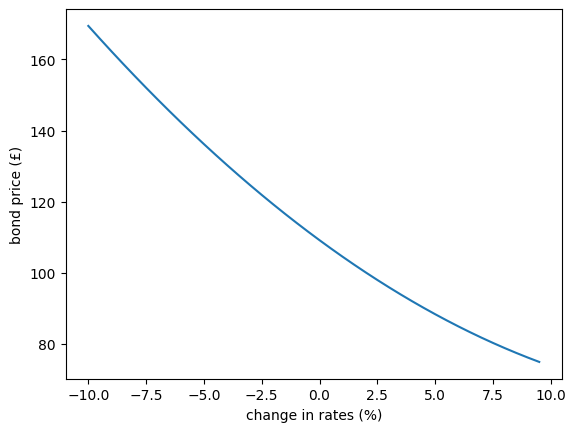

In [173]:
import matplotlib.pyplot as plt

plt.plot((yield_changes * 100), bond_prices)
plt.xlabel("change in rates (%)"), plt.ylabel("bond price (£)")